# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

### 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．



In [2]:
from gensim.models import KeyedVectors

word_vectors = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

In [3]:
word_vectors["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

### 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．



In [4]:
word_vectors.similarity("United_States", "U.S.")

0.73107743

### 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [5]:
result = word_vectors.most_similar(positive=["United_States"], topn=10)
result

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.7400725483894348),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

### 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [8]:
# ans 1: calculate a vector and use it as arg in most_similar
v1 = word_vectors["Spain"]
v2 = word_vectors["Madrid"]
v3 = word_vectors["Athens"]
v = v1 - v2 + v3

result_63 = word_vectors.most_similar(positive=[v], topn=10)
result_63

[('Athens', 0.7528455257415771),
 ('Greece', 0.6685472130775452),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361457467079163),
 ('Greeks', 0.5351787209510803),
 ('Ioannis_Christou', 0.5330225825309753),
 ('Hrysopiyi_Devetzi', 0.5088489651679993),
 ('Iraklion', 0.5059264898300171),
 ('Greek', 0.5040615200996399),
 ('Athens_Greece', 0.5034109950065613)]

In [9]:
# ans 2: use keys as arg in most_similar
word_vectors.most_similar(positive=["Spain","Athens"], negative=["Madrid"], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.555290937423706),
 ('Greeks', 0.5450686812400818),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759141921997),
 ('Athens_Greece', 0.5168809294700623),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

### 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [10]:
!grep -n ": *" "questions-words.txt" # unused lines

1:: capital-common-countries
508:: capital-world
5033:: currency
5900:: city-in-state
8368:: family
8875:: gram1-adjective-to-adverb
9868:: gram2-opposite
10681:: gram3-comparative
12014:: gram4-superlative
13137:: gram5-present-participle
14194:: gram6-nationality-adjective
15794:: gram7-past-tense
17355:: gram8-plural
18688:: gram9-plural-verbs


In [11]:
!grep -n ": *" "questions-words.txt" | cut -d " " -f 1 | sed 's/:://g' > "skip_rows.txt"

In [12]:
with open("skip_rows.txt", "r") as f:
    lines = f.readlines()
    skip_rows = [int(n)-1 for n in lines]
print(skip_rows)

[0, 507, 5032, 5899, 8367, 8874, 9867, 10680, 12013, 13136, 14193, 15793, 17354, 18687]


In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv("questions-words.txt", sep=" ", skiprows=skip_rows, names=["v1", "v2",  "v3", "v4"])
df.head()

,v1,v2,v3,v4
0,Athens,Greece,Baghdad,Iraq
1,Athens,Greece,Bangkok,Thailand
2,Athens,Greece,Beijing,China
3,Athens,Greece,Berlin,Germany
4,Athens,Greece,Bern,Switzerland


In [45]:
from tqdm import tqdm

# v3を含む場合
def most_sim_1(w1, w2, w3):
    v = word_vectors[w2] - word_vectors[w1] + word_vectors[w3]
    return word_vectors.most_similar(positive=[v], topn=1)[0]

# v3を含まない場合
def most_sim_2(w1, w2, w3):
    v = word_vectors[w2] - word_vectors[w1] + word_vectors[w3]
    result = word_vectors.most_similar(positive=[v], topn=2)
    if result[0][0] == w3: # prevent w3 as result
        return result[1]
    else:
        return result[0]
    
# use most_similar's positive and negative arguments
def most_sim_3(w1, w2, w3):
    return word_vectors.most_similar(positive=[w2, w3], negative=[w1], topn=1)[0]

In [46]:
v_sim_1 = [most_sim_1(w1, w2, w3) for w1, w2, w3, i in zip(df["v1"], df["v2"], df["v3"], tqdm(range(len(df))))]
v_sim_1[:5]

100%|██████████████████████████████████▉| 19543/19544 [1:00:34<00:00,  5.38it/s]


[('Baghdad', 0.7489827275276184),
 ('Bangkok', 0.7431141138076782),
 ('China', 0.7186591625213623),
 ('Germany', 0.6720893383026123),
 ('Bern', 0.6902341246604919)]

In [117]:
v_sim_2 = [most_sim_2(w1, w2, w3) for w1, w2, w3, i in zip(df["v1"], df["v2"], df["v3"], tqdm(range(len(df))))]
v_sim_2[:5]

100%|██████████████████████████████████▉| 19543/19544 [2:35:03<00:00,  2.10it/s]


[('Iraqi', 0.6727433204650879),
 ('Thailand', 0.7350419759750366),
 ('China', 0.7186591625213623),
 ('Germany', 0.6720893383026123),
 ('Switzerland', 0.502210259437561)]

In [47]:
v_sim_3 = [most_sim_3(w1, w2, w3) for w1, w2, w3, i in zip(df["v1"], df["v2"], df["v3"], tqdm(range(len(df))))]
v_sim_3[:5]

100%|██████████████████████████████████▉| 19543/19544 [1:00:42<00:00,  5.36it/s]


[('Iraqi', 0.6351870894432068),
 ('Thailand', 0.7137669324874878),
 ('China', 0.7235777378082275),
 ('Germany', 0.6734622716903687),
 ('Switzerland', 0.4919748306274414)]

In [118]:
df["pred_1"] = [item[0] for item in v_sim_1]
df["sim_1"] = [item[1] for item in v_sim_1]
df["pred_2"] = [item[0] for item in v_sim_2]
df["sim_2"] = [item[1] for item in v_sim_2]
df["pred_3"] = [item[0] for item in v_sim_3]
df["sim_3"] = [item[1] for item in v_sim_3]
df.head()

,v1,v2,v3,v4,pred_1,sim_1,pred_3,sim_3,pred_2,sim_2
0,Athens,Greece,Baghdad,Iraq,Baghdad,0.748983,Iraqi,0.635187,Iraqi,0.672743
1,Athens,Greece,Bangkok,Thailand,Bangkok,0.743114,Thailand,0.713767,Thailand,0.735042
2,Athens,Greece,Beijing,China,China,0.718659,China,0.723578,China,0.718659
3,Athens,Greece,Berlin,Germany,Germany,0.672089,Germany,0.673462,Germany,0.672089
4,Athens,Greece,Bern,Switzerland,Bern,0.690234,Switzerland,0.491975,Switzerland,0.502210


In [124]:
df.to_csv("out_64.csv", sep=",", index=False)

### 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [119]:
# 64.を参考に
n_sem = 8874-5
n_syn = len(df) - n_sem

df_sem = df[:n_sem]
df_syn = df[n_sem:]

# 分割の確認
df.iloc[[n_sem-1, n_sem]]

,v1,v2,v3,v4,pred_1,sim_1,pred_3,sim_3,pred_2,sim_2
8868,uncle,aunt,stepson,stepdaughter,stepson,0.855731,stepdaughter,0.753163,stepdaughter,0.772244
8869,amazing,amazingly,apparent,apparently,apparent,0.629424,apparently,0.481730,apparently,0.464964


In [122]:
def get_acc(n):
    pred_col = "pred_" + str(n)
    acc_sem = sum([int(w4==w4_pred) for w4, w4_pred in zip(df_sem["v4"], df_sem[pred_col])])/n_sem
    acc_syn = sum([int(w4==w4_pred) for w4, w4_pred in zip(df_syn["v4"], df_syn[pred_col])])/n_syn
    return acc_sem, acc_syn

for i in range(1, 4):
    print(get_acc(i))

(0.17352576389671892, 0.2253864168618267)
(0.6673807644604803, 0.6615456674473068)
(0.7308602999210734, 0.7400468384074942)


### 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．



In [63]:
# remove first row (column names) 
!tail -n +2 "wordsim353/combined.csv" > combined-noheader.csv

In [61]:
word_vectors.evaluate_word_pairs(pairs="combined-noheader.csv", delimiter=",")

((0.6238773487289394, 1.7963224351216643e-39),
 SpearmanrResult(correlation=0.6589215888009288, pvalue=2.534605645914962e-45),
 0.0)

In [64]:
# same result even not removing theheader row
word_vectors.evaluate_word_pairs(pairs="wordsim353/combined.csv", delimiter=",")

((0.6238773487289394, 1.7963224351216643e-39),
 SpearmanrResult(correlation=0.6589215888009288, pvalue=2.534605645914962e-45),
 0.0)

### 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [98]:
from sklearn.cluster import KMeans

# gather country names
countries = list(set(list(df.loc[:5029]["v2"]) + list(df.loc[:5029]["v4"])))
countries_vec = [word_vectors[c] for c in countries]

# clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(countries_vec)

# show result
ans_67 = [(c, n) for c, n in zip(countries, kmeans.labels_)]
sorted(ans_67, key=lambda x: x[1])

[('Libya', 0),
 ('Syria', 0),
 ('Qatar', 0),
 ('Morocco', 0),
 ('Iraq', 0),
 ('Iran', 0),
 ('Tunisia', 0),
 ('Cyprus', 0),
 ('Lebanon', 0),
 ('Oman', 0),
 ('Jordan', 0),
 ('Turkey', 0),
 ('Afghanistan', 0),
 ('Malta', 0),
 ('Egypt', 0),
 ('Bahrain', 0),
 ('Greece', 0),
 ('Spain', 1),
 ('England', 1),
 ('Italy', 1),
 ('Belgium', 1),
 ('Switzerland', 1),
 ('Sweden', 1),
 ('Greenland', 1),
 ('Norway', 1),
 ('Ireland', 1),
 ('Portugal', 1),
 ('Denmark', 1),
 ('Liechtenstein', 1),
 ('Finland', 1),
 ('Austria', 1),
 ('Germany', 1),
 ('France', 1),
 ('Belize', 2),
 ('Samoa', 2),
 ('Suriname', 2),
 ('Venezuela', 2),
 ('Fiji', 2),
 ('Vietnam', 2),
 ('Philippines', 2),
 ('Ecuador', 2),
 ('Honduras', 2),
 ('Jamaica', 2),
 ('Guyana', 2),
 ('Laos', 2),
 ('Australia', 2),
 ('Thailand', 2),
 ('Tuvalu', 2),
 ('Japan', 2),
 ('Bangladesh', 2),
 ('Nepal', 2),
 ('Pakistan', 2),
 ('Cuba', 2),
 ('China', 2),
 ('Taiwan', 2),
 ('Uruguay', 2),
 ('Bahamas', 2),
 ('Peru', 2),
 ('Dominica', 2),
 ('Canada', 2),
 (

### 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

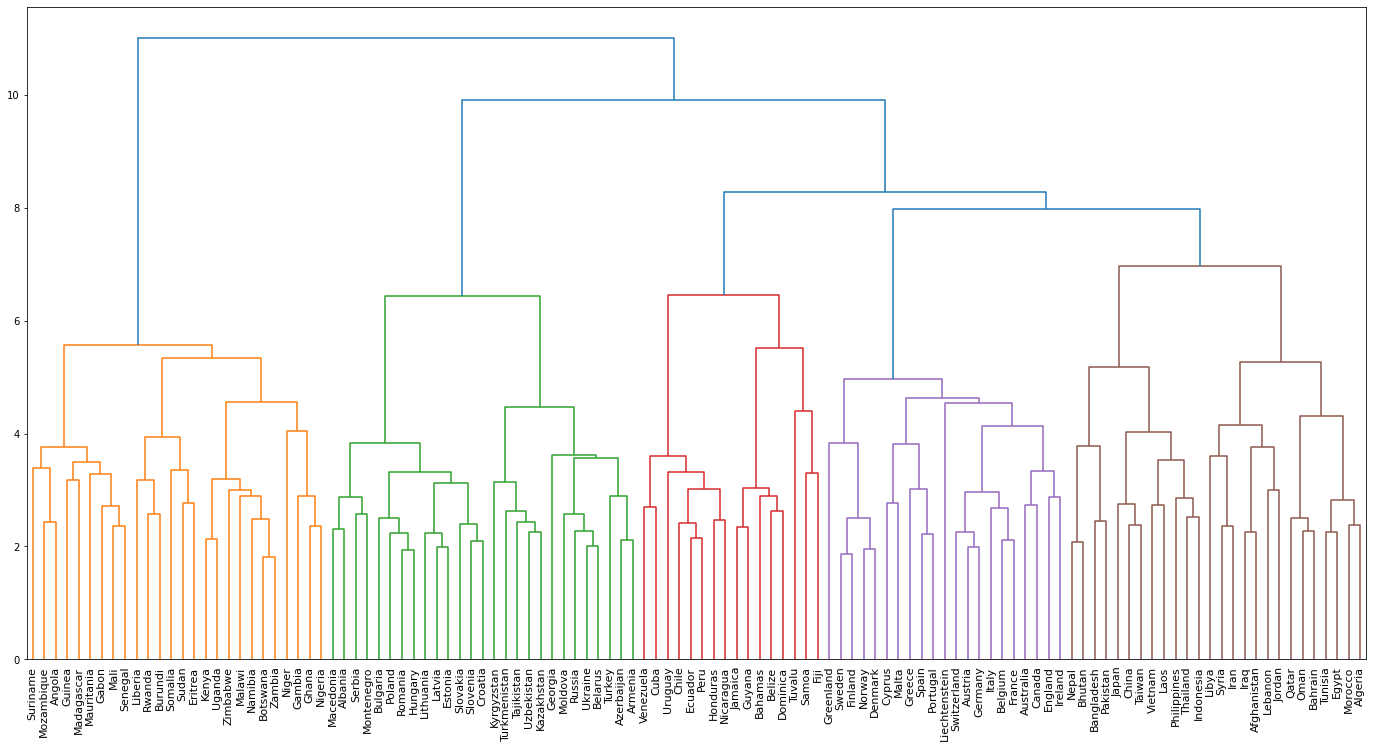

In [104]:
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import pyplot as plt

linked = linkage(countries_vec, 'ward')

plt.figure(figsize=(24,12))
dendrogram(linked, labels=countries, leaf_font_size=11)
plt.show()

### 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

/Users/panatchakorn-a/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/panatchakorn-a/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


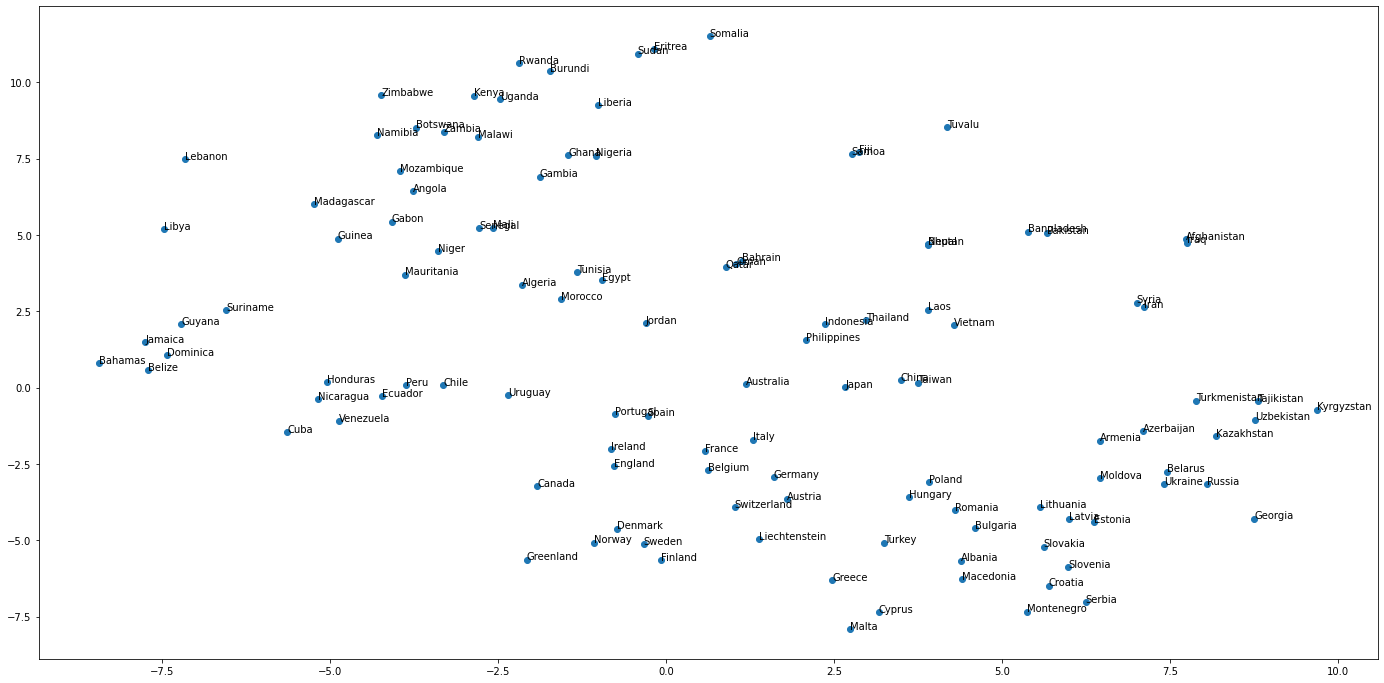

In [111]:
from sklearn.manifold import TSNE

countries_vec_tsne = TSNE(n_components=2, random_state=0).fit_transform(countries_vec)

plt.figure(figsize=(24,12))
plt.scatter(countries_vec_tsne[:,0], countries_vec_tsne[:,1])
for i in range(len(countries)):
    plt.annotate(countries[i], (countries_vec_tsne[i,0],countries_vec_tsne[i,1]))
plt.show()